In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from matplotlib import pyplot as plt
import dvu
import os
from os.path import join as oj
import sys
sys.path.append('../src')
import viz
import numpy as np
import torch
import scipy
from matplotlib import pyplot as plt
from sklearn import metrics
import data
from config import *
from tqdm import tqdm
import pickle as pkl
import train_reg
from copy import deepcopy
import config
import models
import pandas as pd
import features
import outcomes
import neural_networks
from sklearn.model_selection import KFold
from torch import nn, optim
from torch.nn import functional as F
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.svm import SVR
from collections import defaultdict

In [6]:
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append('../src')
import viz

# compare all different models across dsets

## plot accs of models trained on subsamples data

<Figure size 800x600 with 0 Axes>

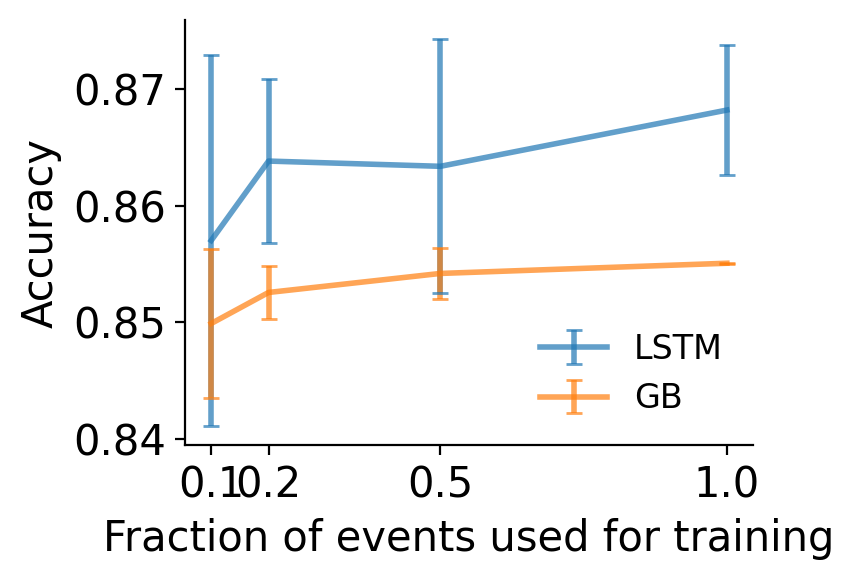

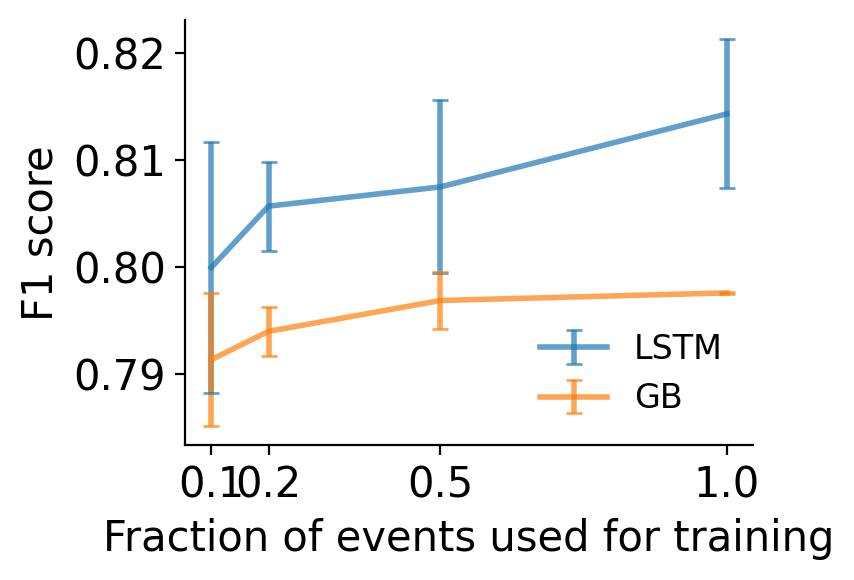

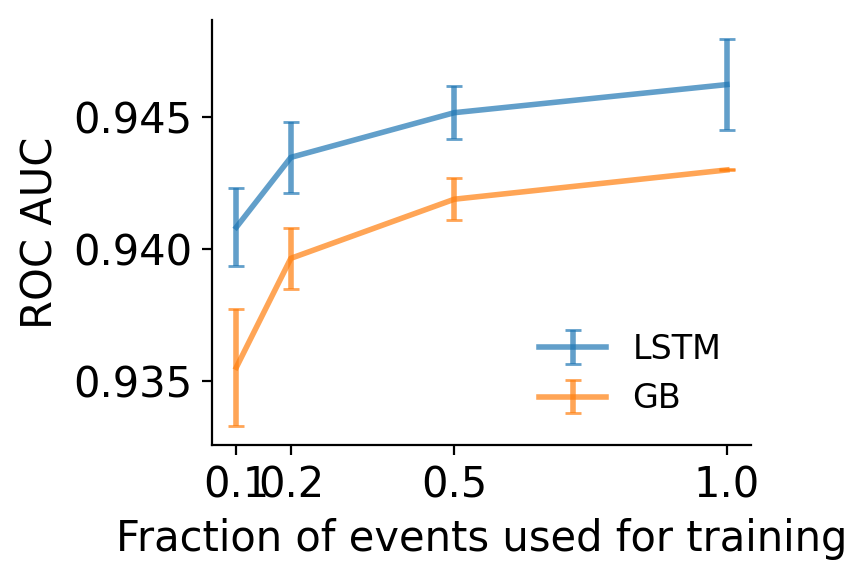

In [9]:
suffix = '_successful_full' # '_successful', _successful_dynamin # '' choose which outcome to use
plot_label = {"accuracy": "Accuracy", "f1": "F1 score", "roc.auc": "ROC AUC"}
res = pkl.load(open(f'../reports/data_size_stability_10{suffix}.pkl', 'rb'))
#fig = plt.figure(dpi=200, figsize=(4.9, 3.5))
#ax = plt.subplot(1, 1, 1)
accs = {'gb': np.zeros(4), 'lstm': np.zeros(4)}
stds = {'gb': np.zeros(4), 'lstm': np.zeros(4)}

for metric in ['accuracy', 'f1', 'roc.auc']:
    plt.figure(dpi=200, figsize=(4, 3))
    for i, k in enumerate([10, 5, 2, 1]):
        for m in ['gb', 'lstm']:
            errs = np.array([res[(k, j, m, metric)] for j in range(10)])
            accs[m][i] = np.mean(errs)
            stds[m][i] = np.std(errs)
    plt.errorbar([0.1, 0.2, 0.5, 1], accs['lstm'], stds['lstm'], linewidth=2,  alpha=.7, capsize=3, label='LSTM')
    #plt.errorbar([0.1, 0.2, 0.5, 1], accs['lstm'])
    plt.errorbar([0.1, 0.2, 0.5, 1], accs['gb'], stds['gb'], linewidth=2, alpha=.7, capsize=3, label='GB')
    #plt.errorbar([0.1, 0.2, 0.5, 1], accs['gb'])

    plt.xticks([0.1, 0.2, 0.5, 1.0])

    # could also add in the dasc line, but it's lower everywhere.
    # dasc_acc = pkl.load(open(f'../reports/data_size_stability_10_dasc_acc.pkl', 'rb'))
    # plt.axhline(dasc_acc)


    plt.xlabel("Fraction of events used for training")
    #plt.ylabel("Accuracy")
    plt.ylabel(plot_label[metric])
    plt.legend(loc='lower right', fontsize='large', frameon=False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    viz.savefig(f'data_size_stability_{metric}')
    # plt.yticks([0.8, 0.82, 0.84])
    plt.show()